#  **Import Packages**

In [0]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sb
%matplotlib inline

# Read dataset and store in a DataFrame

In [2]:
# read the dataset
df = pd.read_csv('final.csv', na_values = ['Null'])

#print head
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


clientId  clientIncome incomeVerified  clientAge clientGender  \
0  755398623       52500.0          False         29       FEMALE   
1  915689736       52500.0          False         25         MALE   
2  292629156       35000.0          False         32         MALE   
3  671710636       35000.0          False         28       FEMALE   
4  367769827       35000.0          False         34         MALE   

  clientMaritalStatus clientLoanPurpose clientResidentialStauts clientState  \
0              Single          business                  Rented        KANO   
1              Single          business                  Rented       LAGOS   
2              Single         education                  Rented     ANAMBRA   
3             Married          business           Own Residence        OSUN   
4             Married           medical                  Rented        ONDO   

  clientTimeAtEmployer     ...                        paidAt  loanAmount  \
0                    7     ...       2018-09-04 11:54:00 UTC       16000   
1                   21     ...       2018-09-06 04:44:04 UTC       14500   
2                   29     ...                           NaN       19500   
3                  36+     ...       2018-07-10 11:23:31 UTC       19500   
4                  36+     ...       2018-08-09 06:05:37 UTC       17500   

  interestRate loanTerm  max_amount_taken max_tenor_taken settleDays  \
0         20.0       60                 1               1        -12   
1         15.0       60                 0               1        -15   
2         15.0       60                 0               1         64   
3         15.0       60                 1               1        -10   
4         12.5       60                 1               1         12   

  firstPaymentRatio firstPaymentDefault loan_Default  
0               0.0                   0            0  
1               0.0                   0            0  
2               0.0                   1            1  
3               0.0                   0            0  
4               0.0                   1            1  

[5 rows x 31 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 31 columns):
clientId                     159596 non-null int64
clientIncome                 159596 non-null float64
incomeVerified               159493 non-null object
clientAge                    159596 non-null int64
clientGender                 159596 non-null object
clientMaritalStatus          159590 non-null object
clientLoanPurpose            159596 non-null object
clientResidentialStauts      158460 non-null object
clientState                  159595 non-null object
clientTimeAtEmployer         155402 non-null object
clientNumberPhoneContacts    156888 non-null float64
clientAvgCallsPerDay         156909 non-null float64
loanId                       159596 non-null object
loanType                     159596 non-null object
loanNumber                   159596 non-null int64
applicationDate              159596 non-null object
approvalDate                 159596 non-null object
decli

In [4]:
df.shape

(159596, 31)

# Data cleaning

In [0]:
newdf = df.copy()

### lets review columns with missing values

In [0]:
# Function to calculate missing values by column
def missing_values_table(newdf):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * newdf.isnull().sum() / len(newdf)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(newdf.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Lets see our columns with missing values
missing_values_table(newdf)

Your selected dataframe has 31 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
declinedDate                       159589              100.0
paidAt                              29800               18.7
clientTimeAtEmployer                 4194                2.6
clientNumberPhoneContacts            2708                1.7
clientAvgCallsPerDay                 2687                1.7
clientResidentialStauts              1136                0.7
incomeVerified                        103                0.1
clientMaritalStatus                     6                0.0
clientState                             1                0.0

## Lets drop missing columns with more than 30% missing values

In [8]:
# Get the columns with > 30% missing
missing_df = missing_values_table(newdf);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 30].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 31 columns.
There are 9 columns that have missing values.
We will remove 1 columns.


In [0]:
# Drop the columns
newdf = newdf.drop(columns = list(missing_columns))

In [0]:
df = newdf.copy()

In [0]:
# Replace all occurrences of Not Available with numpy not a number
df = df.replace({'Null': np.nan, '36+': 36})

## lets correct datatypes

In [0]:
# Change to date datatype
df['applicationDate'] = pd.to_datetime(df['applicationDate'])
df['approvalDate'] = pd.to_datetime(df['approvalDate'])
df['disbursementDate'] = pd.to_datetime(df['disbursementDate'])
df['dueDate'] = pd.to_datetime(df['dueDate'])
df['paidAt'] = pd.to_datetime(df['paidAt'])

In [13]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 30 columns):
clientId                     159596 non-null int64
clientIncome                 159596 non-null float64
incomeVerified               159493 non-null object
clientAge                    159596 non-null int64
clientGender                 159596 non-null object
clientMaritalStatus          159590 non-null object
clientLoanPurpose            159596 non-null object
clientResidentialStauts      158460 non-null object
clientState                  159595 non-null object
clientTimeAtEmployer         155402 non-null object
clientNumberPhoneContacts    156888 non-null float64
clientAvgCallsPerDay         156909 non-null float64
loanId                       159596 non-null object
loanType                     159596 non-null object
loanNumber                   159596 non-null int64
applicationDate              159596 non-null datetime64[ns]
approvalDate                 159596 non-null date

In [0]:
# Iterate through the columns
for col in list(df.columns):
    # Select columns that should be numeric
    if ('clientTimeAtEmployer' in col or 'clientNumberPhoneContacts' in col or 'clientAvgCallsPerDay' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)

### drop null values

In [15]:
# making new data frame with dropped NA values 
newdf = df.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(df), "\nNew data frame length:",  
       len(newdf), "\nNumber of rows with at least 1 NA value: ", 
       (len(df)-len(newdf))) 

Old data frame length: 159596 
New data frame length: 123621 
Number of rows with at least 1 NA value:  35975


In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123621 entries, 0 to 159595
Data columns (total 30 columns):
clientId                     123621 non-null int64
clientIncome                 123621 non-null float64
incomeVerified               123621 non-null object
clientAge                    123621 non-null int64
clientGender                 123621 non-null object
clientMaritalStatus          123621 non-null object
clientLoanPurpose            123621 non-null object
clientResidentialStauts      123621 non-null object
clientState                  123621 non-null object
clientTimeAtEmployer         123621 non-null float64
clientNumberPhoneContacts    123621 non-null float64
clientAvgCallsPerDay         123621 non-null float64
loanId                       123621 non-null object
loanType                     123621 non-null object
loanNumber                   123621 non-null int64
applicationDate              123621 non-null datetime64[ns]
approvalDate                 123621 non-null dat

In [0]:
df = newdf.copy()

# Exploratory Data Analysis

## Univariate

In [19]:
# descriptive statistics for numeric variables
print(df.describe())

           clientId  clientIncome      clientAge  clientTimeAtEmployer  \
count  1.236210e+05  1.236210e+05  123621.000000         123621.000000   
mean   4.974213e+08  9.333815e+04      34.008664             27.047274   
std    2.942164e+08  9.874888e+04       7.081368             12.228029   
min    5.060000e+02  3.000000e+01      18.000000             -7.000000   
25%    2.477845e+08  3.500000e+04      29.000000             17.000000   
50%    4.962708e+08  7.000000e+04      33.000000             36.000000   
75%    7.449712e+08  1.050000e+05      38.000000             36.000000   
max    9.365832e+09  3.925000e+06     138.000000             36.000000   

       clientNumberPhoneContacts  clientAvgCallsPerDay     loanNumber  \
count              123621.000000         123621.000000  123621.000000   
mean                 1283.983231             59.999889       3.639535   
std                  1543.043432            104.305424       2.602679   
min                     1.000000         

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


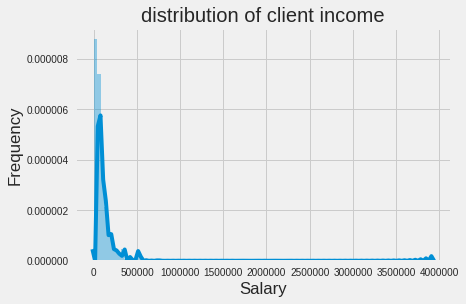

In [22]:
# histogram
sb.distplot(df['clientIncome'], bins=100)
# Add labels
plt.style.use('fivethirtyeight')
plt.title('distribution of client income')
plt.xlabel('Salary')
plt.ylabel('Frequency');

This distribution shows most of the client in our data earn below 1,000,000

In [23]:
#histogram
sb.distplot(df['loanAmount']) 

# Add labels
plt.title('Loan amount distribution of clients')
plt.xlabel('Amount')
plt.ylabel('Frequency');

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


This distribution shows most of the client loan below 100,000 but it is obvious we have some outliers.

### Let's remove the outliers in this column above then we'll see our distribution again

In [0]:
# Calculate first and third quartile
first_quartile = df['loanAmount'].describe()['25%']
third_quartile = df['loanAmount'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['loanAmount'] > (first_quartile - 3 * iqr)) &
            (df['loanAmount'] < (third_quartile + 3 * iqr))]

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).

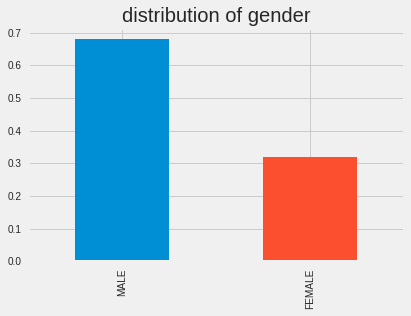

In [25]:
# histogram

df['clientGender'].value_counts(normalize = True).plot.bar()
plt.title('distribution of gender');

This shows us that we have more male clients than female clients.

## Bivariate

In [26]:
# Group by resident then sum the amount.
res10 = df.groupby('clientResidentialStauts')['loanAmount'].count().sort_values(ascending = False).head(10)

# plot
res10.plot.bar(title="People who loan money most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Residential status', color = 'black', fontsize = '13');


This tells us clients wiith rented homes loan money more

In [27]:
# Group by purpose then count the people.
pur10 = df.groupby('clientLoanPurpose')['loanAmount'].count().sort_values(ascending = False).head(10)

# plot
pur10.plot.bar(title="People who loan money most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Residential status', color = 'black', fontsize = '13');


This tells us clients who want to invest in business borrow money most

## Let's check for correlations

In [0]:
client_stats = df[['clientIncome', 'clientAge', 'incomeVerified', 'clientGender', 'clientMaritalStatus', 'clientLoanPurpose', 
                   'clientResidentialStauts', 'clientTimeAtEmployer', 'clientAvgCallsPerDay', 'loanAmount',
                   'interestRate','loanTerm','max_amount_taken','max_tenor_taken','settleDays', 'firstPaymentRatio',
                  'firstPaymentDefault', 'loan_Default']]

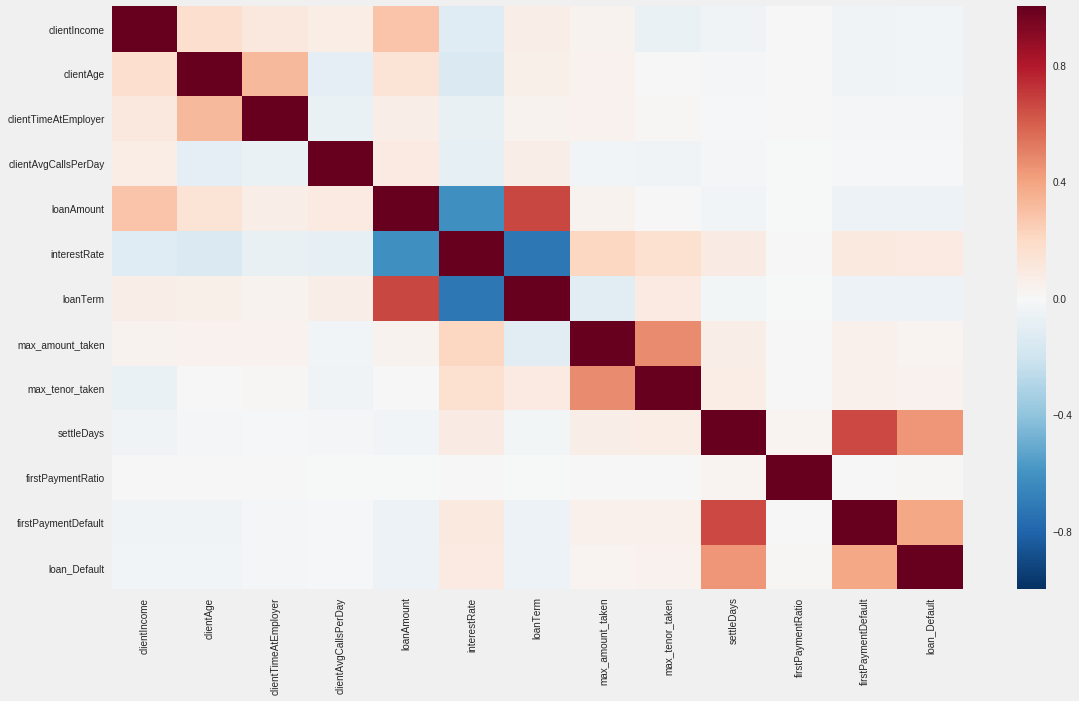

In [88]:
# plotting heatmap 
ax = plt.subplots(1,1, figsize=(17,10))
corr = client_stats.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

## Let’s do one-hot encoding for the gender column, incomeVerified, clientMaritalStatus, clientLoanPurpose, clientResidentialStauts so that we can turn the categorical variables to numeric. Let’s make the following changes:

## I'll use the replace value technique this time as i don't have so many columns to change.

In [0]:
# convert to numeric int
df['incomeVerified'] = df['incomeVerified'].astype(int)

In [0]:
# replace values of the incomeverified column
df = df.replace('False', '1')
df = df.replace('True', '0')

In [31]:
# confirm changes
df['incomeVerified'].value_counts()

0    100194
1     18136
Name: incomeVerified, dtype: int64

In [0]:
# replace values by mapping

gender = {'FEMALE': 0, 'MALE': 1}
clientmarital = {'Married': 0, 'Single': 1, 'Separated': 2,'Widowed': 3, 'Divorced': 4}
loanpurpose = {'business': 0, 'other': 1, 'house': 2,'education': 3, 'medical': 4}
resident = {'Rented': 0, 'Own Residence': 1, 'Family Owned': 2,'Employer Provided': 3, 'Temp. Residence': 4}

In [0]:
# replace values of the below column

df['clientGender'] = df['clientGender'].map(gender)
df['clientMaritalStatus'] = df['clientMaritalStatus'].map(clientmarital)
df['clientLoanPurpose'] = df['clientLoanPurpose'].map(loanpurpose)
df['clientResidentialStauts'] = df['clientResidentialStauts'].map(resident)

In [0]:
# convert to numeric datatype
dt = {'clientGender': int, 'incomeVerified': int, 'clientMaritalStatus': int, 'clientLoanPurpose': int,
                'clientResidentialStauts': int, 'loanAmount': int, 'loanAmount': int, 'loanTerm' : int,
                 'max_amount_taken': int, 'max_tenor_taken': int, 'settleDays': int, 'firstPaymentDefault': int,
     'loan_Default': int}    
df = df.astype(dt)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118330 entries, 0 to 159595
Data columns (total 30 columns):
clientId                     118330 non-null int64
clientIncome                 118330 non-null float64
incomeVerified               118330 non-null int64
clientAge                    118330 non-null int64
clientGender                 118330 non-null int64
clientMaritalStatus          118330 non-null int64
clientLoanPurpose            118330 non-null int64
clientResidentialStauts      118330 non-null int64
clientState                  118330 non-null object
clientTimeAtEmployer         118330 non-null float64
clientNumberPhoneContacts    118330 non-null float64
clientAvgCallsPerDay         118330 non-null float64
loanId                       118330 non-null object
loanType                     118330 non-null object
loanNumber                   118330 non-null int64
applicationDate              118330 non-null datetime64[ns]
approvalDate                 118330 non-null datetime

## Now lets perform feature scaling and build our models

In [37]:
# create a new dataframe containing only the numeric columns
numdata = df.copy()
numdata = numdata.select_dtypes(include=[np.number]) 
numdata.shape

(118330, 21)

In [39]:
numdata.head()

clientId  clientIncome  incomeVerified  clientAge  clientGender  \
0  755398623       52500.0               0         29             0   
1  915689736       52500.0               0         25             1   
3  671710636       35000.0               0         28             0   
4  367769827       35000.0               0         34             1   
5  118787472       10000.0               0         25             1   

   clientMaritalStatus  clientLoanPurpose  clientResidentialStauts  \
0                    1                  0                        0   
1                    1                  0                        0   
3                    0                  0                        1   
4                    0                  4                        0   
5                    1                  3                        0   

   clientTimeAtEmployer  clientNumberPhoneContacts      ...       loanNumber  \
0                   7.0                      257.0      ...                6   
1                  21.0                     3964.0      ...                9   
3                  36.0                     2764.0      ...                4   
4                  36.0                      504.0      ...                5   
5                  36.0                      895.0      ...                2   

   loanAmount  interestRate  loanTerm  max_amount_taken  max_tenor_taken  \
0       16000          20.0        60                 1                1   
1       14500          15.0        60                 0                1   
3       19500          15.0        60                 1                1   
4       17500          12.5        60                 1                1   
5       14500          15.0        60                 0                1   

   settleDays  firstPaymentRatio  firstPaymentDefault  loan_Default  
0         -12                0.0                    0             0  
1         -15                0.0                    0             0  
3         -10                0.0                    0             0  
4          12                0.0                    1             1  
5          44                0.0                    1             1  

[5 rows x 21 columns]

In [0]:
# creating input features and target variables
X= numdata.iloc[:,1:20]  #independent columns
y = numdata.iloc[:,20]    #target column

In [41]:
#Let's view our features
X.head(2)

clientIncome  incomeVerified  clientAge  clientGender  clientMaritalStatus  \
0       52500.0               0         29             0                    1   
1       52500.0               0         25             1                    1   

   clientLoanPurpose  clientResidentialStauts  clientTimeAtEmployer  \
0                  0                        0                   7.0   
1                  0                        0                  21.0   

   clientNumberPhoneContacts  clientAvgCallsPerDay  loanNumber  loanAmount  \
0                      257.0            153.000000           6       16000   
1                     3964.0            269.426415           9       14500   

   interestRate  loanTerm  max_amount_taken  max_tenor_taken  settleDays  \
0          20.0        60                 1                1         -12   
1          15.0        60                 0                1         -15   

   firstPaymentRatio  firstPaymentDefault  
0                0.0                    0  
1                0.0                    0

## Now let's build our random forest model that perform a binary classification on each loan.

### First lets know if we have a imbalanced data or not before training our model. Note: In a case where we have imbalanced data, our accuracy don't matter much. So we do over sampling or under sampling

In [59]:
# our target variable
numdata['loan_Default'].value_counts()

0    104811
1     13519
Name: loan_Default, dtype: int64

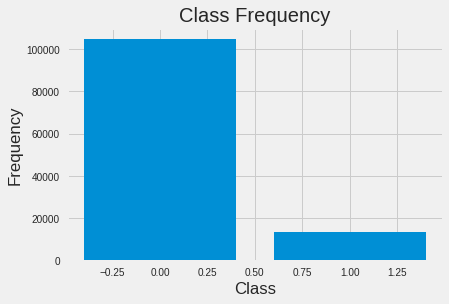

In [61]:
# check for imbalanced data 
classes = numdata['loan_Default'].values

unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show();

### This tells us we have an imbalanced data, we will do over sampling.

In [0]:
# import libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [0]:
X= numdata.iloc[:,1:20]  #independent columns
y = numdata.iloc[:,20]    #target column
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [50]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (82831, 19) (82831,)
Testing set: (35499, 19) (35499,)


In [51]:
y_train.value_counts()

0    73343
1     9488
Name: loan_Default, dtype: int64

In [0]:
smt = SMOTE()
smX_train, smY_train = smt.fit_sample(X_train, y_train)

In [53]:
np.bincount(smY_train)

array([73343, 73343])

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [112]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print('Accuracy score is    ',metrics.accuracy_score(y_test, y_pred))

# Precision  
print('Precision score is    ',metrics.precision_score(y_test, y_pred))

# Recall
print('Recall score is       ',metrics.recall_score(y_test, y_pred))

# F1 score
print('F1 score is           ',metrics.f1_score(y_test,y_pred))


print('===================================')
print(metrics.classification_report(y_test,y_pred))
print('===================================')
c_metric=metrics.confusion_matrix(y_test,y_pred)
print(c_metric)

Accuracy score is     0.9139694075889462
Precision score is     0.8997407087294728
Recall score is        0.26162352349836643
F1 score is            0.4053738317757009
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     31520
           1       0.90      0.26      0.41      3979

   micro avg       0.91      0.91      0.91     35499
   macro avg       0.91      0.63      0.68     35499
weighted avg       0.91      0.91      0.89     35499

[[31404   116]
 [ 2938  1041]]


In [57]:
# extracting true_positives, false_positives, false_negatives, true_negatives

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('True Negatives:',tn)
print('True Positives:',fp)
print('False Negatives:',fn)
print('True Positives:',tp)

True Negatives: 31020
True Positives: 448
False Negatives: 2824
True Positives: 1207


[0.02507113 0.00701907 0.02928804 0.06682735 0.07495006 0.05649384
 0.04637881 0.0303841  0.0351189  0.0342307  0.02494584 0.0225614
 0.01631637 0.01208323 0.0183533  0.01044715 0.25531667 0.
 0.23421405]


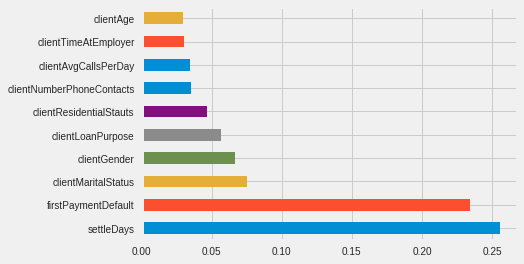

In [58]:
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show();

## Now let's build our neural network that perform a binary classification on each loan.

In [0]:
# creating input features and target variables
X= numdata.iloc[:,1:20]  #independent columns
y = numdata.iloc[:,20]    #target column

In [63]:
#Let's view our features
X.head(2)

clientIncome  incomeVerified  clientAge  clientGender  clientMaritalStatus  \
0       52500.0               0         29             0                    1   
1       52500.0               0         25             1                    1   

   clientLoanPurpose  clientResidentialStauts  clientTimeAtEmployer  \
0                  0                        0                   7.0   
1                  0                        0                  21.0   

   clientNumberPhoneContacts  clientAvgCallsPerDay  loanNumber  loanAmount  \
0                      257.0            153.000000           6       16000   
1                     3964.0            269.426415           9       14500   

   interestRate  loanTerm  max_amount_taken  max_tenor_taken  settleDays  \
0          20.0        60                 1                1         -12   
1          15.0        60                 0                1         -15   

   firstPaymentRatio  firstPaymentDefault  
0                0.0                    0  
1                0.0                    0

In [64]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.39033444, -0.42545134, -0.69143875, ..., -0.75903239,
        -0.00290706, -0.45466744],
       [-0.39033444, -0.42545134, -1.25721929, ..., -0.91465475,
        -0.00290706, -0.45466744],
       [-0.57904202, -0.42545134, -0.83288389, ..., -0.65528415,
        -0.00290706, -0.45466744],
       ...,
       [-0.2045047 ,  2.35044506,  1.71312853, ..., -0.18841708,
        -0.00290706, -0.45466744],
       [ 1.49674139, -0.42545134,  0.58156745, ..., -0.18841708,
        -0.00290706, -0.45466744],
       [-0.57904202, -0.42545134, -0.54999362, ..., -0.18841708,
        -0.00290706, -0.45466744]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# import libraries
from keras import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=19))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [105]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=10)

Epoch 1/10
82831/82831 [==============================] - 11s 134us/step - loss: 0.2800 - acc: 0.9043
Epoch 2/10
82831/82831 [==============================] - 11s 139us/step - loss: 0.2622 - acc: 0.9083
Epoch 3/10
82831/82831 [==============================] - 11s 131us/step - loss: 0.2596 - acc: 0.9105
Epoch 4/10
82831/82831 [==============================] - 11s 128us/step - loss: 0.2576 - acc: 0.9111
Epoch 5/10
82831/82831 [==============================] - 11s 135us/step - loss: 0.2565 - acc: 0.9116
Epoch 6/10
82831/82831 [==============================] - 11s 129us/step - loss: 0.2557 - acc: 0.9117
Epoch 7/10
82831/82831 [==============================] - 11s 129us/step - loss: 0.2553 - acc: 0.9117
Epoch 8/10
82831/82831 [==============================] - 11s 127us/step - loss: 0.2550 - acc: 0.9120
Epoch 9/10
82831/82831 [==============================] - 11s 128us/step - loss: 0.2543 - acc: 0.9120
Epoch 10/10
82831/82831 [==============================] - 11s 128us/step - loss: 

In [106]:
# lets evaluate our model

eval_model=classifier.evaluate(X_train, y_train)
eval_model

82831/82831 [==============================] - 2s 22us/step


[0.25363085901256094, 0.9121102002880517]

In [0]:
# create hyperparameter space
epochs = [5, 10]
batches = [5,10, 100]
optimizers = ['rmsprop', 'adam']

hyperparameters = dict(optimizer = optimizers, epochs=epochs, batch_size =batches)

In [0]:
y_predd=classifier.predict(X_test)
y_predd =(y_predd>0.5)

In [108]:
cm = metrics.confusion_matrix(y_test, y_predd)
print(cm)

[[31377    38]
 [ 3159   925]]


In [109]:
# Accuracy
print('Accuracy score is    ',metrics.accuracy_score(y_test, y_predd))

# Precision  
print('Precision score is    ',metrics.precision_score(y_test, y_predd))

# Recall
print('Recall score is       ',metrics.recall_score(y_test, y_predd))

# F1 score
print('F1 score is           ',metrics.f1_score(y_test, y_predd))

Accuracy score is     0.9099411251021156
Precision score is     0.960539979231568
Recall score is        0.22649363369245837
F1 score is            0.36655438874578955
